# Character Name Generator

Author: Sarwar Zahan (Sarwar.Zahan@ibm.com)

Github repository for the code and data

[Character Name Generator](https://github.com/sarwarzahan/character-name-generator)

## Process data

###First copy the data from github repo

In [1]:
!git clone https://github.com/sarwarzahan/character-name-generator

Cloning into 'character-name-generator'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


###Read the data file

In [2]:
file = open("character-name-generator/Dinosaur Names Training Data.txt", "r")
data = file.read()
file.close()

###Mark the end of each name by dot (.)

In [3]:
data = data.replace('\n', '.\n')
data = data + '.'
print(data[:94])

Aachenosaurus.
Aardonyx.
Abdallahsaurus.
Abelisaurus.
Abrictosaurus.
Abrosaurus.
Abydosaurus.



###Tokenize the names
For reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

In [4]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer(
    filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t ',
    lower=True,
    split='\n',
)
tokenizer.fit_on_texts(data)

In [5]:
char_to_index = tokenizer.word_index
print(char_to_index)
index_to_char = {v: k for k, v in char_to_index.items()}
print(index_to_char)

{'a': 1, 's': 2, 'u': 3, 'o': 4, 'r': 5, '.': 6, 'n': 7, 'i': 8, 'e': 9, 't': 10, 'l': 11, 'p': 12, 'h': 13, 'c': 14, 'g': 15, 'd': 16, 'm': 17, 'y': 18, 'b': 19, 'k': 20, 'v': 21, 'x': 22, 'z': 23, 'j': 24, 'w': 25, 'f': 26, 'q': 27}
{1: 'a', 2: 's', 3: 'u', 4: 'o', 5: 'r', 6: '.', 7: 'n', 8: 'i', 9: 'e', 10: 't', 11: 'l', 12: 'p', 13: 'h', 14: 'c', 15: 'g', 16: 'd', 17: 'm', 18: 'y', 19: 'b', 20: 'k', 21: 'v', 22: 'x', 23: 'z', 24: 'j', 25: 'w', 26: 'f', 27: 'q'}


### Convert the names into sequences based on char index

In [6]:
names = data.splitlines()
print(names[0])
tokenizer.texts_to_sequences(names[0])

Aachenosaurus.


[[1], [1], [14], [13], [9], [7], [4], [2], [1], [3], [5], [3], [2], [6]]

In [7]:
def name_to_sequence(name):
  flat_list = []
  sequences = tokenizer.texts_to_sequences(name)
  for sublist in sequences:
    for item in sublist:
      flat_list.append(item)
  return flat_list

In [8]:
name_to_sequence(names[0])

[1, 1, 14, 13, 9, 7, 4, 2, 1, 3, 5, 3, 2, 6]

In [9]:
def sequence_to_name(seq):
  name = ''
  for i in seq:
    name += index_to_char[i]
  return name; 

In [10]:
sequence_to_name(name_to_sequence(names[0]))

'aachenosaurus.'

### Create all possible list of sequences from the names


In [11]:
sequences= []
for name in names:
  seq = name_to_sequence(name)
  if len(seq) >= 2:
    sequences += [seq[:i] for i in range(2, len(seq) + 1)]

In [12]:
sequences[:13]

[[1, 1],
 [1, 1, 14],
 [1, 1, 14, 13],
 [1, 1, 14, 13, 9],
 [1, 1, 14, 13, 9, 7],
 [1, 1, 14, 13, 9, 7, 4],
 [1, 1, 14, 13, 9, 7, 4, 2],
 [1, 1, 14, 13, 9, 7, 4, 2, 1],
 [1, 1, 14, 13, 9, 7, 4, 2, 1, 3],
 [1, 1, 14, 13, 9, 7, 4, 2, 1, 3, 5],
 [1, 1, 14, 13, 9, 7, 4, 2, 1, 3, 5, 3],
 [1, 1, 14, 13, 9, 7, 4, 2, 1, 3, 5, 3, 2],
 [1, 1, 14, 13, 9, 7, 4, 2, 1, 3, 5, 3, 2, 6]]

In [13]:
max_len = max([len(x) for x in sequences])
print(max_len)

27


### Pad all sequences for a fixed length

In [14]:
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(
    sequences, padding='pre',
    maxlen=max_len
)
print(padded_sequences[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [15]:
padded_sequences.shape

(18374, 27)

## Create data sets

In [16]:
x, y = padded_sequences[:, :-1], padded_sequences[:, -1]
print(x[0])
print(y[0])
print(x[1])
print(y[1])
print(x[2])
print(y[2])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
14
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  1 14]
13


In [17]:
print(x.shape)
print(y.shape)

(18374, 26)
(18374,)


 ### Split data into training and validation sets (optional)
 If we want to use validation dataset to fine tune the model hyperparameters

In [18]:
from sklearn.model_selection import train_test_split

x_training, x_validation, y_training, y_validation = train_test_split(x, y)
print(x_training.shape, y_training.shape)
print(x_validation.shape, y_validation.shape)

(13780, 26) (13780,)
(4594, 26) (4594,)


## Size of all possible characters + 1. We padded using 0, so we have to count it.

In [19]:
num_chars = len(char_to_index.keys()) + 1
print(num_chars)

28


## Model

### Create the Model

1.   Embedding layer to convert the discrete numbers from character representation to a continuous vector representation with lower dimensions for faster processing compared to one hot encoding. As the different types of names or vocabulary is not so large, so feature vector dimension 16 is quite enough. Tried with 8 which gave .8246 whereas 16 gave .8292, increasing more doesn't increasing accuracy that much. Shape of the training data after splitting to examples and labels (which is 26), so input length is max_len-1. - https://keras.io/api/layers/core_layers/embedding/

2.   Convolution layer to extract features. Here filter size 512 (guessing to extract 512 different features, tried with different filter size like 256 gave .8360 accuracy and 512 gave .8417 accuracy, increasing filter size improves accuracy a bit much but it is computationally expensive), kernel size 7 (tried with 3 which gave .8195 accuracy, 5 a bit more but after 7 not so much improvement in accuracy), activation tanh (tried with relu but tanh is giving better accuracy faster with the training set), padding causal (output at time t only depends on the previous time steps which is quite common for time series data. We will only consider characters previous to spefic position of a name, not after that). - https://keras.io/api/layers/convolution_layers/convolution1d/

3. MaxPool1D to reduce the output dimension of previous layer. It also reduces computational load and prevent overfitting of the data. This layer is quite common after Convolution layer. The default pool_size is 2, which means it will reduce the dimension to half - https://keras.io/api/layers/pooling_layers/max_pooling1d/

4. Long Short-Term Memory (LSTM) layer for learning the order of characters and their depecdence in names. 32 is the dimensionality of the output space of this layer (tried different dimensionality like 32 gave .8310 accuracy, 64  gave .8335 accuracy and 128 .8344 accuracy. So increasing the dimension doesn't improve the accuracy that much. I might be wrong, it could be the reason that we have max length 27, so increasing the dimensionality isn't improving the accuracy). - https://keras.io/api/layers/recurrent_layers/lstm/

5. Output layer (Dense), here num_chars is the dimentionality of output and activation softmax which is quite common for multi-class classification problem. The softmax activation assign probability of each character in a sequence when generating names and it helps the training converge much faster. - https://keras.io/api/layers/core_layers/dense/

### Compile the Model

https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

1.   The target is interger representation of character (through index) in a multi-class classification problem, so the loss is sparse_categorical_crossentropy
2.   Adam optimiztion algorithm is quite efficient compared to others. 



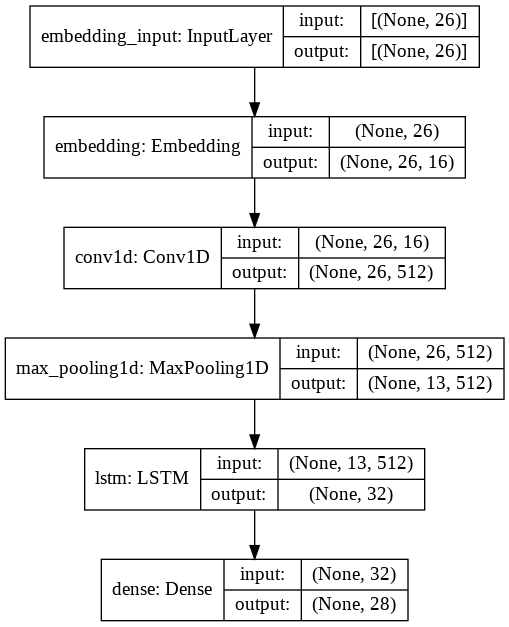

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 26, 16)            448       
_________________________________________________________________
conv1d (Conv1D)              (None, 26, 512)           57856     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 13, 512)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                69760     
_________________________________________________________________
dense (Dense)                (None, 28)                924       
Total params: 128,988
Trainable params: 128,988
Non-trainable params: 0
_________________________________________________________________


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, LSTM
from tensorflow.keras.layers import Bidirectional, Dense
from IPython.display import Image, display

model = Sequential([
                    Embedding(num_chars, 16, input_length=max_len-1),
                    Conv1D(512, 7, activation='tanh', padding='causal'),
                    MaxPool1D(),
                    LSTM(32),
                    Dense(num_chars, activation='softmax')
])

model_image = tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)
display(model_image)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

## Train the Model

Train the model maximum 200 times, If the accuracy doesn't improve in 50 epochs, stop the training. 

Using the validation set stops the training quite early as the validation accuracy doesn't improve any more. If there is more training data and validation data is more scrambled, that might improve the accuracy for validation data.

If validation set is used, replace the following line with this:

h = model.fit(
    x_training, y_training,
    validation_data=(x_validation, y_validation),
    epochs=200, verbose=2,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50)
    ]
)

In [21]:
h = model.fit(
    x, y,
    epochs=200, verbose=2,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=50)
    ]
)

Epoch 1/200
575/575 - 36s - loss: 2.2494 - accuracy: 0.3431
Epoch 2/200
575/575 - 2s - loss: 1.8394 - accuracy: 0.4558
Epoch 3/200
575/575 - 2s - loss: 1.7250 - accuracy: 0.4887
Epoch 4/200
575/575 - 2s - loss: 1.6460 - accuracy: 0.5102
Epoch 5/200
575/575 - 2s - loss: 1.5831 - accuracy: 0.5266
Epoch 6/200
575/575 - 2s - loss: 1.5319 - accuracy: 0.5428
Epoch 7/200
575/575 - 2s - loss: 1.4868 - accuracy: 0.5575
Epoch 8/200
575/575 - 2s - loss: 1.4433 - accuracy: 0.5702
Epoch 9/200
575/575 - 2s - loss: 1.4034 - accuracy: 0.5814
Epoch 10/200
575/575 - 2s - loss: 1.3634 - accuracy: 0.5930
Epoch 11/200
575/575 - 2s - loss: 1.3224 - accuracy: 0.6062
Epoch 12/200
575/575 - 2s - loss: 1.2837 - accuracy: 0.6163
Epoch 13/200
575/575 - 2s - loss: 1.2475 - accuracy: 0.6269
Epoch 14/200
575/575 - 2s - loss: 1.2105 - accuracy: 0.6345
Epoch 15/200
575/575 - 2s - loss: 1.1706 - accuracy: 0.6498
Epoch 16/200
575/575 - 2s - loss: 1.1369 - accuracy: 0.6580
Epoch 17/200
575/575 - 2s - loss: 1.1026 - accur

To compare with validation set, uncomment the commented line. 

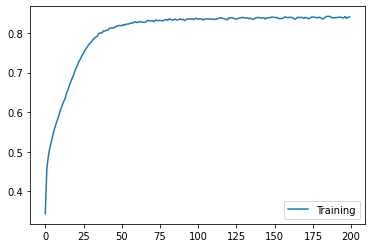

In [22]:
from matplotlib import pyplot as plt

epochs_ran = len(h.history['loss'])

#plt.plot(range(0, epochs_ran), h.history['val_accuracy'], label='Validation')
plt.plot(range(0, epochs_ran), h.history['accuracy'], label='Training')
plt.legend()
plt.show()

## Generate the names from starting characters

In [23]:
def generate_name(starting_characters):
  for i in range(0, 50):
    sequence = name_to_sequence(starting_characters)
    padded = tf.keras.preprocessing.sequence.pad_sequences([sequence], padding='pre',
                                                           maxlen=max_len-1,
                                                           truncating='pre')
    prediction = model.predict(padded)[0]
    prediction_char = index_to_char[tf.argmax(prediction).numpy()]
    starting_characters += prediction_char
    if prediction_char == '.':
      break
  # Remove last character(.) and uppercase first character    
  print(starting_characters[:-1].capitalize())

In [24]:
generate_name('Rap')

Raptorex


## Generate the names with no input

In [25]:
# remove the stop character(.) from char_to_index
numbers_list = dict(char_to_index)
del numbers_list['.']
all_possible_characters = numbers_list.keys()
def generate_list_of_names():
  for char in all_possible_characters:
    generate_name(char)


In [26]:
generate_list_of_names()

Anasazisaurus
Saurophaganax
Unenlagia
Ornithomimoides
Rachitrema
Nanyangosaurus
Ischisaurus
Europelta
Tatankaceratops
Lamplughsaura
Palaeocursornis
Huaxiagnathus
Camptonotus
Galveosaurus
Dachongosaurus
Mantellisaurus
Yunnanosaurus
Baryonyx
Kulindapteryx
Velociraptor
Xinjiangtitan
Zhuchengtyrannus
Jiangshanosaurus
Wulagasaurus
Fukuisaurus
Qinlingosaurus
